# Practical 5: Visualising Sea Ice Extent in the Arctic

In this practical we will use the skills you learned last week for visualising spatial data in Python to look at the Sea Ice extent over the North Polar Ice cap.

The dataset we'll be using was published by [Walsh et al. in 2019](https://dx.doi.org/10.7265/jj4s-tq79), and contains monthly sea ice 'concentration' across the arctic from 1850 to 2013. 'Concentration' is a measure of how much of a given area is covered by sea ice, and is expressed as a percentage.

Just like last week, the first step is to get CartoPy set up in Google Colab. Run the cell below to do this.

In [ ]:
# Set up Cartopy in your Google Colab environment
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install -q -c conda-forge cartopy

# install cftime, nc-time-axis and a specific version of xarray, which are needed later for handling data later in the practical
!pip install cftime
!pip install nc-time-axis
!pip install xarray==2023.6.0

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.1/999.1 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 21.4 MB/s eta 0:00:00


Now CartoPy is set up, use the skills you learned in the last practical to create a map of the North Pole using the NorthPolarStereo Coordinate Reference System.
Add the land, ocean, coastlines and country borders to your map. Add gridlines to your map showing the latitude and longitude. Zoom in on the North Pole by using the `set_extent` method to limit the latitude to 60-90 degrees.

> **Hint**: You will need to set the `crs=` argument in the `set_extent` to work in latitude and longitude, like you did in the last practical...

/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


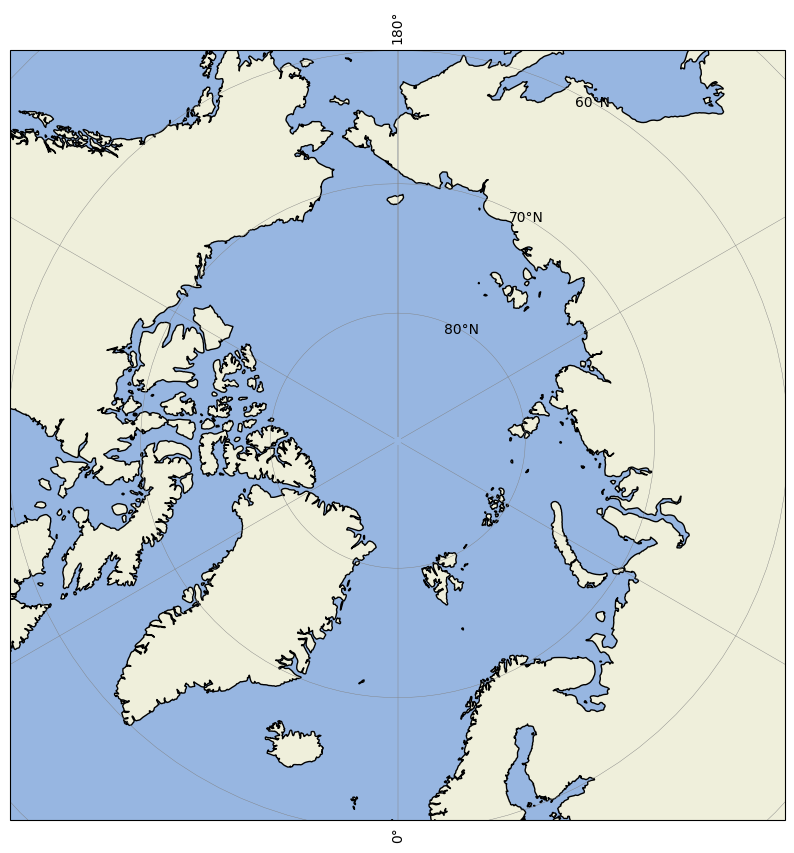

In [ ]:
# do it here
import matplotlib.pyplot as plt
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features

map_projection = ccrs.NorthPolarStereo()

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': map_projection})
ax.gridlines(draw_labels=True,color='grey',linewidth=0.3)
ax.set_extent([-180.0, 180.0, 60.0, 90.0], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)


This map will be the 'canvas' that you draw data on... now we need to get the data.

## Multi-dimensional data

The dataset we'll be working with today is a lot more complicated that the simple row/column datasets ones you've seen before. This is because it is a three dimensional dataset, with the dimensions being latitude, longitude and time.
At each point in space and time there are multiple variables, including sea ice concentration.

A dataset of this complexity is difficult (and very inneficient!) to store in a simple text format, so specific formats have been developed to store this type of multi-dimensional data. There are two common formats used for scientific data:
 - **Hierarchical Data Format (HDF)** is a format developed by the National Center for Supercomputing Applications (NCSA), and is a highly adaptable data format used to store all types of multi-dimensional data.
 - **Network Common Data Form (NetCDF)** is a format developed by the Unidata Program Center (UPC) to store and organize large amounts of data. It is very common in the climate observation and modelling community.

In both cases, the data are stored in a binary file format, meaning that it is not human readable, but it is very efficient for storing large amounts of data.

Today, we'll be working with a NetCDF file. We cannot used `pandas` to read this file - `pandas` is strictly designed for dealing with 2D tabular data. Instead, we'll use a library called `xarray`, which is specifically designed for working with multi-dimensional data.

The code in the cell below downloads the datafile, imports it into xarray, and displays a summary of the data file which details the dimensions, coordinates, data variables, and the attributes of the data set.

This might take a moment to run, because it has to download a large file.

In [ ]:
import xarray as xr
import urllib

data_url = "https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M5_G10010_sibt1850_v2.0.nc"

# download the data file
urllib.request.urlretrieve(data_url, 'sea_ice_data.nc')

#open the nc file in xarray
ds = xr.open_dataset('sea_ice_data.nc')

#display the dataset summary
ds

<xarray.Dataset>
Dimensions:          (latitude: 240, longitude: 1440, time: 2016)
Coordinates:
  * latitude         (latitude) float32 89.88 89.62 89.38 ... 30.62 30.38 30.12
  * longitude        (longitude) float32 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * time             (time) object 1850-01-15 00:00:00 ... 2017-12-15 00:00:00
Data variables:
    seaice_conc      (time, latitude, longitude) uint8 ...
    seaice_source    (time, latitude, longitude) uint8 ...
    LandRegion_mask  (latitude, longitude) uint8 ...
    Gridcell_Area    (latitude) float32 ...
Attributes:
    version:       2.0
    release_date:  February 28, 2019
    Conventions:   CF-1.4
    citation:      https://doi.org/10.1111/j.1931-0846.2016.12195.x
    dataset_doi:   https://nsidc.org/data/g10010

## Visualising Arctic Sea Ice Extent

In this section, we're going to work towards creating a 12 by 12 figure displaying sea-ice showing the sea ice concentration for a specific month plotted on the base map you created above.

There are a few things we need to work out to do this:
1. How to select a single time slice from the data set.
2. How to plot the data in that time slice.
3. How to plot the data in that time slice *on your base map*
4. How to make it look good...


### Selecting a single time slice

As you can imagine, selecting slices of data along an axis is a very common task with multi-dimensional data, so `xarray` has a method that can do it for us.

The `sel` method allows us to select a slice of data along a given dimension. In this case, we want to select a slice of data along the `time` dimension. The syntax for this is:

```python
ds.sel(coordinate='value')
```

In the cell below, use the `sel` method to select the data for January 2013 and save it in a new variable called `ds_jan_2013`. Take a look at this dataset, and check that it only contains one dimension in the 'time' axis to make sure you've done it properly.

In [ ]:
# do it here
ds_jan_2013=ds.sel(time='2013-01')
ds_jan_2013

<xarray.Dataset>
Dimensions:          (latitude: 240, longitude: 1440, time: 1)
Coordinates:
  * latitude         (latitude) float32 89.88 89.62 89.38 ... 30.62 30.38 30.12
  * longitude        (longitude) float32 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * time             (time) object 2013-01-15 00:00:00
Data variables:
    seaice_conc      (time, latitude, longitude) uint8 ...
    seaice_source    (time, latitude, longitude) uint8 ...
    LandRegion_mask  (latitude, longitude) uint8 ...
    Gridcell_Area    (latitude) float32 ...
Attributes:
    version:       2.0
    release_date:  February 28, 2019
    Conventions:   CF-1.4
    citation:      https://doi.org/10.1111/j.1931-0846.2016.12195.x
    dataset_doi:   https://nsidc.org/data/g10010

### Plotting Data

Now we have a single time slice of data, we can plot it. `xarray` also has a number of plotting methods that are designed to play nicely with `matplotlib`, and make it (more) painless to plot multi-dimensional data.

The syntax for plotting data from an `xarray` dataset is:

```python
ds['data_variable'].plot()
```

Create a plot of sea ice concentration in January 2013 in the cell below.

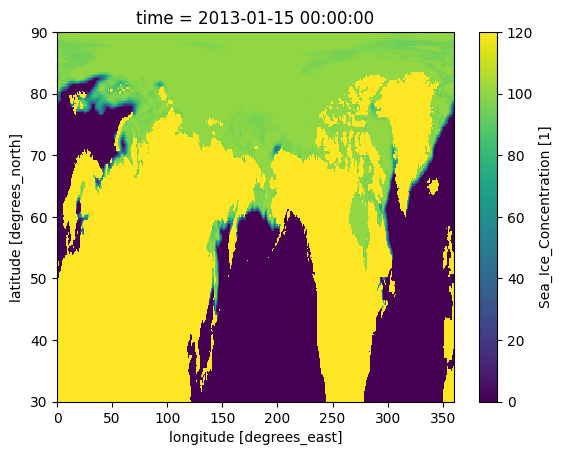

In [ ]:
# do it here
ds_jan_2013['seaice_conc'].plot()


The plot you just created probably looks quite unpleasant because it's using a poorly chosen colour scale, and isn't very useful because it's in an inappropriate coordinate reference system. Let's fix this!

### Plotting on your basemap

Copy the code you wrote above to create a map of the north pole. Now, when you use the `ds.plot()` method, use the optional `ax=` argument to tell it to plot on your map. You'll also need to use the `transform=` argument to so that `matplotlib` knows you're giving it latitude and longitude data, just like we did in the last practical.

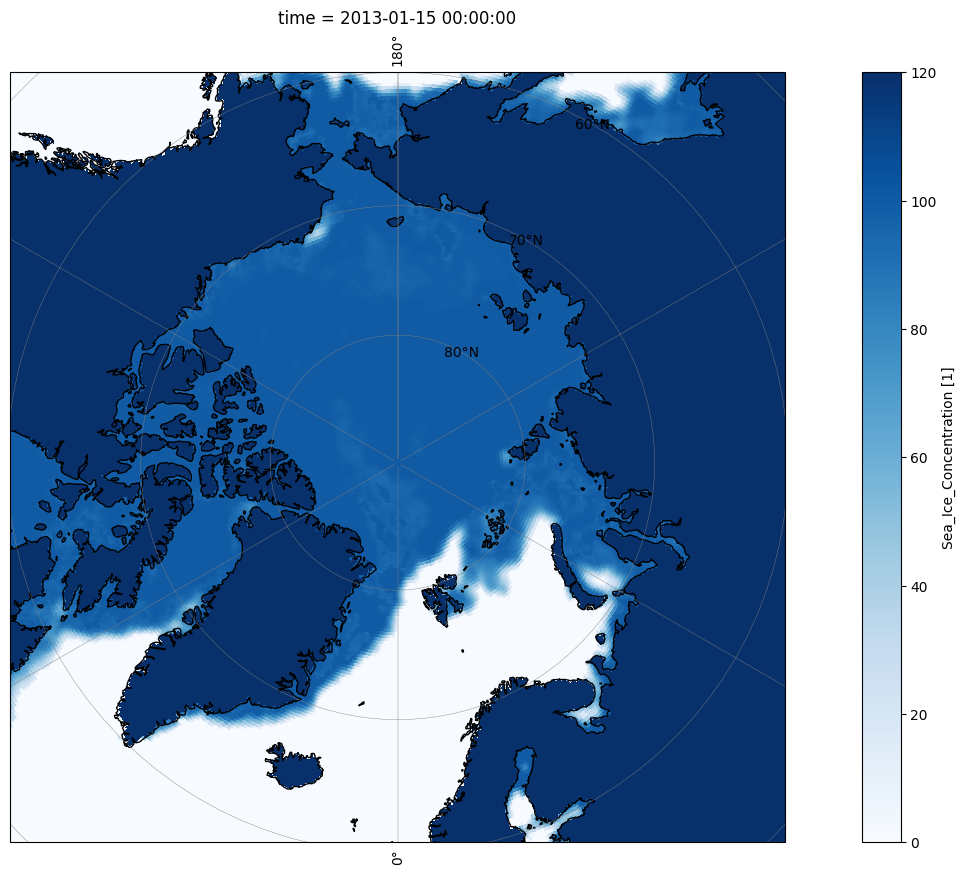

In [ ]:
# do it here
#making my map of the north pole
map_projection = ccrs.NorthPolarStereo()
import numpy as np

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': map_projection})
ax.gridlines(draw_labels=True,color='grey',linewidth=0.3)
ax.set_extent([-180.0, 180.0, 60.0, 90.0], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)


ds_jan_2013['seaice_conc'].plot(ax=ax,transform=ccrs.PlateCarree(), cmap=plt.cm.Blues,vmin=0,vmax=120)





Now you should have a functioning map of sea ice concentration in the Arctic in January 2013... but it still dosn't *look* very good. Let's fix that!

### Making it look good

There are a few things we can do to make this plot look better:
1. Use a better **colour map** - a colour map is used to convert numeric values into colours on a plot. The default colour map that you're seeing here is called `viridis`, and was developed to effectively show patterns in data while being 'perceptually uniform'... i.t. colour-blind friendly! It's a very good default option, but we can do a better job of representing the pattern we're looking at. You can find a list of the colour maps available in `matplotlib` [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html). Have a think about which colour map might be good for representing the sea ice concentration data, and use it by adding `cmap=plt.cm.<colourmap_name>` to the `plot()` method.
2. Set the data limits. You'll notice here that your colour scale goes up to 120, which is not very sensible for a percentage sea ice! If you look at the 'attributes' for the `seaice_conc` variable in your dataset (by clicking on the little 'clipboard' icon on the right of the dataset name when you looked at the summary), you'll know that this because the dataset marks land with a value of 120. We probably shouldn't be displaying this! You can choose the minimum and maximum values to display by adding `vmin=<min_value>` and `vmax=<max_value>` to the `plot()` method.

> **Hint**: You'll probably find that the LAND and COASTLINE layers you added to your previous plot aren't visible once you've added the data. This is because the data are plotted on top of the other layers by default. You can fix this by setting `zorder=2` when you add the `cfeature` layers to your map. `zorder` tells it the order of the layers in the plot, with the higher number layers appearing on top of the lower layers.

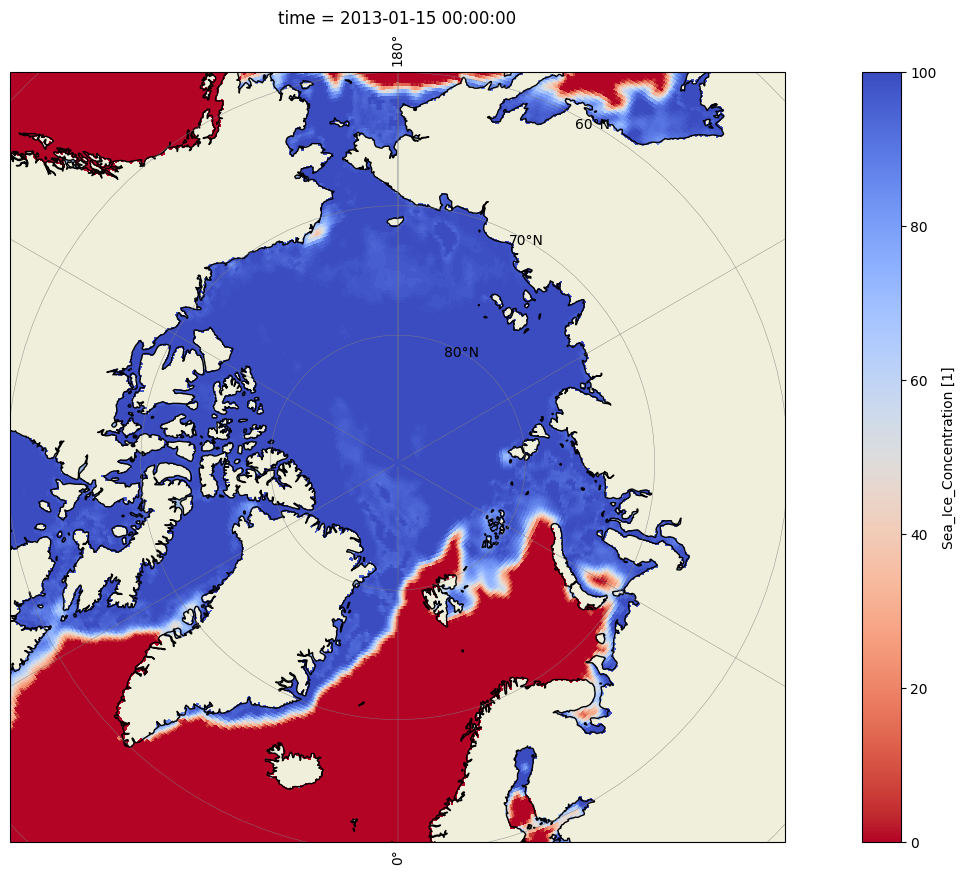

In [ ]:
# do it here
map_projection = ccrs.NorthPolarStereo()

ds_jan_2013=ds.sel(time='2013-01')

masked_data = ds_jan_2013['seaice_conc'].squeeze()


masked_data1 = masked_data.where(masked_data != 120, np.nan)

land = ax.pcolormesh(masked_data1['longitude'], masked_data1['latitude'], masked_data1, cmap='Greens', alpha=0.7, transform=ccrs.PlateCarree()) # Use masked_data1 directly


fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': map_projection})
ax.gridlines(draw_labels=True,color='grey',linewidth=0.3)
ax.set_extent([-180.0, 180.0, 60.0, 90.0], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)


masked_data1.plot(ax=ax,transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm_r,vmin=0,vmax=100)

Now you've made this plot, you could make the same graph for any month in the dataset by changing the month and year in the `sel` method, and look for time-dependent trends in the data... but it's difficult to see the trends in a single plot.

## Time Trends

In the next cell, we've provided a framework to create a 4x3 grid of plots showing the sea ice concentration for a particular month every n years. This code uses a `loop`, to iterate through each of the axes, select the data and draw the plot. Don't worry too much about the details of this for now... you'll see many more loops next term!

Add your code to draw the plot at each timestep. Can you see any trends in the data?

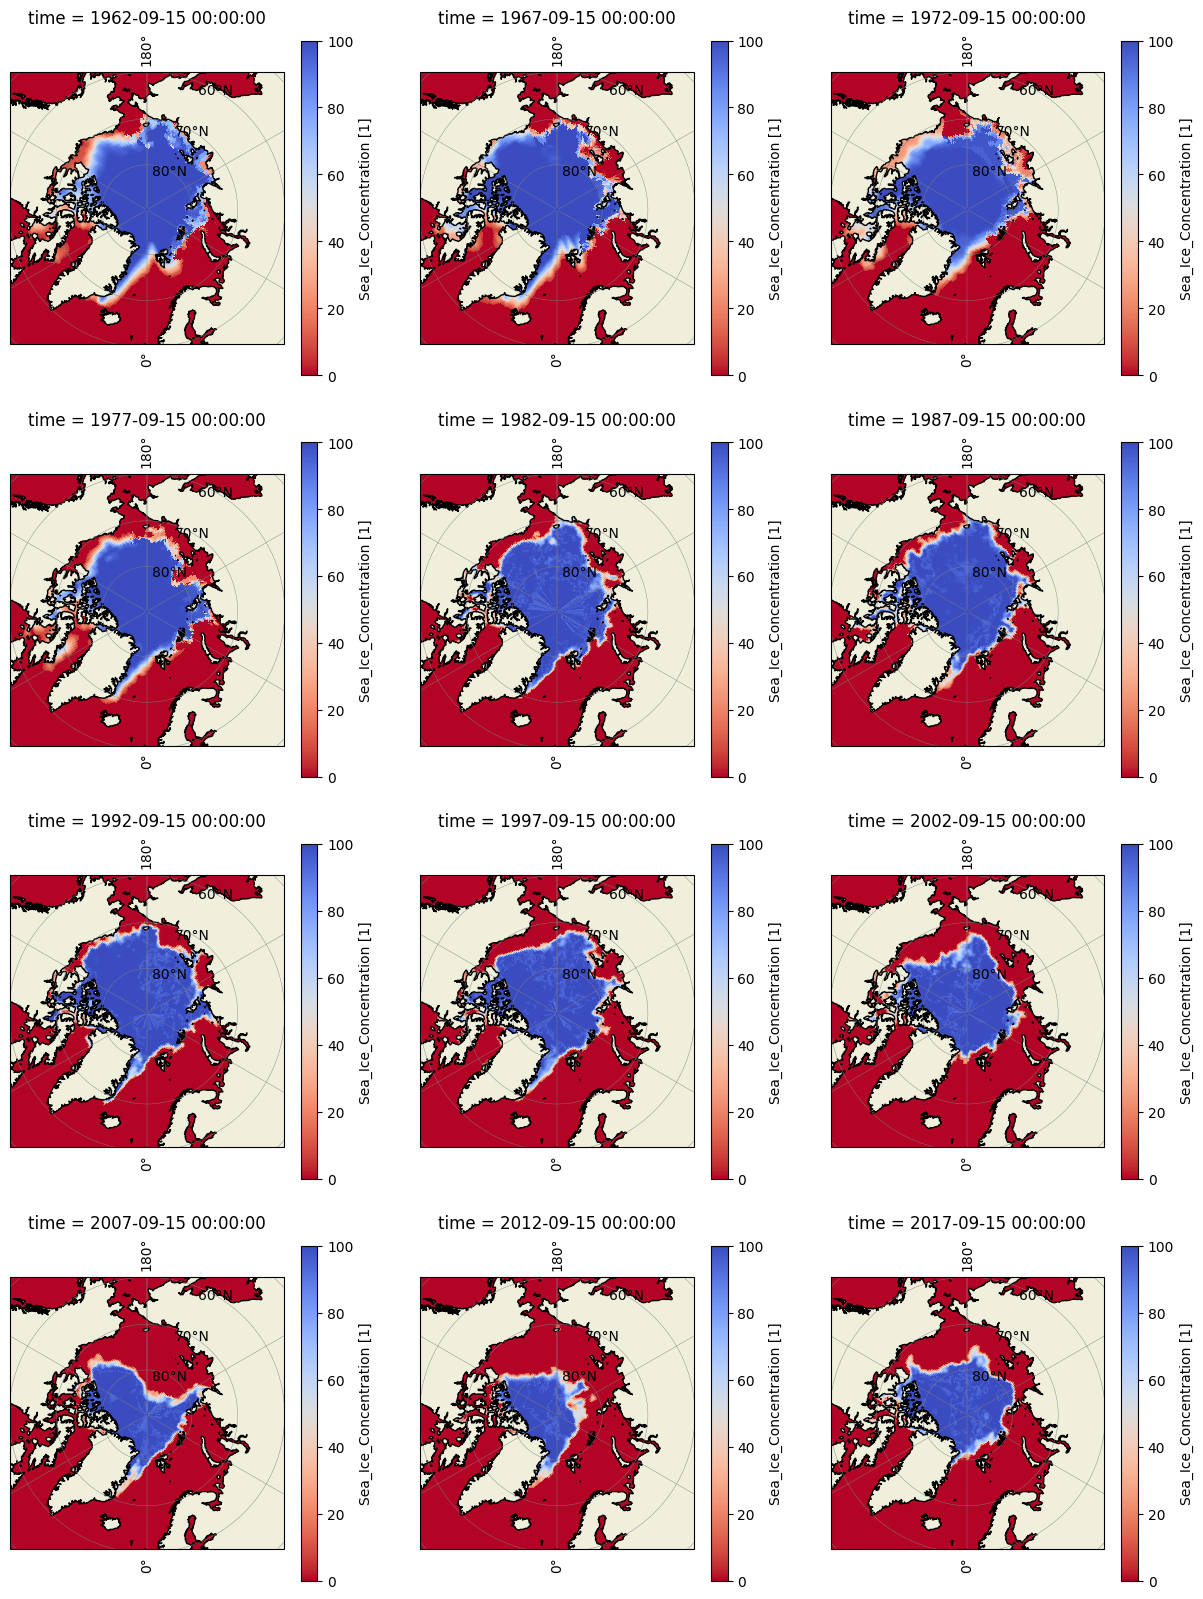

In [ ]:
# Set map projection
map_projection = ccrs.NorthPolarStereo()

# Create figure and axes objects and flatten the axes
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20),subplot_kw={'projection': map_projection})

start_year = 1962  # the year we're starting from
target_month = 9  # september
timestep = 5  # the number of years between each plot

# Create a for loop over the axes
for i, ax in enumerate(axs.flat):
    subset = ds.sel(time=f'{start_year + i * timestep}-{target_month:02}') # select the data from a specific time point

    # add your code to plot the data here (note that it has to be indented with 4 spaces so that it is 'inside' the for loop)
    masked_data = subset['seaice_conc'].squeeze() #use subset to get data from correct timestep


    masked_data1 = masked_data.where(masked_data != 120, np.nan)

    #Plot the data - you only need to create the figure once, outside of the loop
    land = ax.pcolormesh(masked_data1['longitude'], masked_data1['latitude'], masked_data1, cmap='Greens', alpha=0.7, transform=ccrs.PlateCarree())

    ax.gridlines(draw_labels=True,color='grey',linewidth=0.3)
    ax.set_extent([-180.0, 180.0, 60.0, 90.0], crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAND)


    masked_data1.plot(ax=ax,transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm_r,vmin=0,vmax=100)

Visually we can start to see trends within the dataset using this kind of approach. However, this is a very subjective way of analysing the data... what if we want to be more quantitative about it?

For example, we might want to quantify how sea ice concentration is changing through time by calculating the average coverage for the whole Arctic, and plotting it as a function of time. This would allow us to see how the sea ice is changing with time. It might also be sensible to do this for a single month of the year, as we know that sea ice coverage varies a lot throughout the year.

We're touching on this here because it's a very common task with environmental data, and a useful thing to be able to see how to do... but **the type of data manipulation you're about to see is beyond the scope of this course**. This is just for interest, to give you an idea of what you can do with this kind of data.

Text(0, 0.5, 'Percentage sea ice cover')

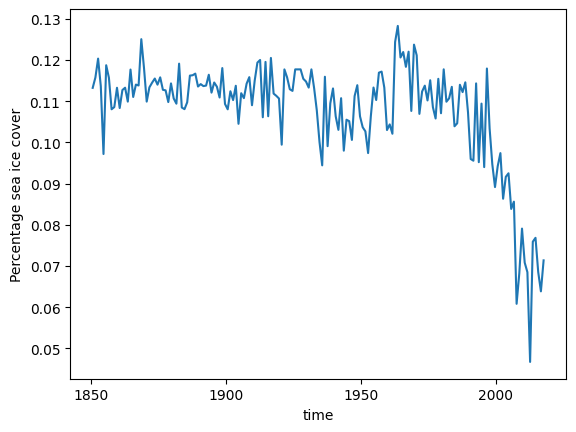

In [ ]:
target_month = 9  # september

# first, we create a subset containing only data from the target month
septds = ds.sel(time=ds.time.dt.month == target_month)

# next, we need to remove all the '120' value representing land, as these will mess up our calculated average. We can do this using the .where() function
septds['seaice_conc'] = septds['seaice_conc'].where(septds['seaice_conc']!=120, drop=True)

# now we can calculate the average, which must account for the variable area of each grid cell in the dataset (remember that the coordinate reference system distorts data at the poles, so each latitude and longitude grid cell has a different area!)
septds['seaice_area'] = (septds['seaice_conc'] / 100) * septds['Gridcell_Area']

# then calcualte the total area of non-land grid cells in the dataset (i.e. whereve the sea ice concentration is not NaN)
septds['total_area'] = septds['seaice_conc'].where(septds['seaice_conc'].isnull(), 1) * septds['Gridcell_Area']

# finally, sum both of these and divide one by the other to get the average sea ice concentration across the entire region - this is effectivly calculating a weighted average, using the grid cell area as the weighting factor
sea_ice_trend = septds.seaice_area.sum(dim=['latitude','longitude'], skipna=True) / septds.total_area.sum(dim=['latitude','longitude'], skipna=True)

# ploit the trend
sea_ice_trend.plot() #plot the total percentage of sea ice coverage in the entire dataset
plt.ylabel('Percentage sea ice cover') #set y label

For the rest of the practical, you'll be working with some average data that we have extracted from the dataset for you.

This summary csv file contains the area of the arctic that contains a sea ice concentration greater than 15% within a variety of different areas within the region. There is also a summary column containing the total area of all ice in the Arctic.

Here is a map of the different regions contained within the dataset:
<div>
<img src="https://raw.githubusercontent.com/Quantitative-Environmental-Science/data/main/figures/ArcticRegionMap.png" width="500"/>
</div>

<p>

> **Stretch Goal**: This map was created using a similar code as for plotting the sea ice extent, but using the `land_region_mask` variable... Can you re-create this plot?*

The first row of the data file below the headers contains the area of the region.

Read in the dataset in the cell below.

In [ ]:
# do it here

summary_url = 'https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M5_sibt_extents_v2.csv'
summary.head()



,YYYYDDD,Northern_Hemisphere,Beaufort_Sea,Chukchi_Sea,East_Siberian_Sea,Laptev_Sea,Kara_Sea,Barents_Sea,Greenland_Sea,Baffin_Bay_Gulf_of_St._Lawrence,Canadian_Archipelago,Hudson_Bay,Central_Arctic,Bering_Sea,Baltic_Sea,Sea_of_Okhotsk,Yellow_Sea,Cook_Inlet
0,RegnArea,64469952.54,1061907.23,958779.67,1085864.77,892614.79,937165.12,1647909.99,3359950.91,3990207.40,867128.10,1267354.07,3216316.32,2804270.43,523051.01,2186062.69,433877.64,570036.2
1,1850015,15563301.05,1061907.23,958779.67,1085864.77,888444.52,925300.08,1104845.81,1233119.01,1356253.67,863449.97,1266116.68,3215959.05,758934.43,134403.73,709856.83,0.00,0.0
2,1850046,16258351.82,1061907.23,958779.67,1085864.77,888879.76,925237.15,1070872.44,1291331.69,1816984.19,863327.56,1265801.17,3215959.05,891219.49,178247.70,743874.35,0.00,0.0
3,1850074,16497991.84,1061907.23,958779.67,1085864.77,888012.52,925237.15,1020670.95,1354519.65,1870649.82,863327.56,1265801.17,3215959.05,1076875.93,163969.87,746350.90,0.00,0.0
4,1850105,16065016.34,1061907.23,958779.67,1085864.77,888012.52,929222.72,1295707.36,1269971.38,1520766.05,863327.56,1265801.17,3215959.05,826977.76,140133.52,742519.98,0.00,0.0


To make useful comparisons between areas in this dataset, we must first calculate the percentage of each area that is covered with sea ice.

Do this by dividing each column by the first value in that column. Save the results in a new variable called `sea_ice_percent`.

> **Hint**: You might want to make use of the `.iloc` method to select the data to do this.

In [ ]:
# do it here
import pandas as pd
# do it here
import pandas as pd
summary=pd.read_csv('https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M5_sibt_extents_v2.csv',skiprows=1)

Northern_Hemisphere=summary.iloc[1:,1]/summary.iloc[0,1]
Beaufort_sea=summary.iloc[1:,2]/summary.iloc[0,2]
Chukhi_sea=summary.iloc[1:,3]/summary.iloc[0,3]
East_Siberian_Sea=summary.iloc[1:,4]/summary.iloc[0,4]
Laptev_sea=summary.iloc[1:,5]/summary.iloc[0,5]
Kara_sea=summary.iloc[1:,6]/summary.iloc[0,6]
Barents_sea=summary.iloc[1:,7]/summary.iloc[0,7]
Greenland_sea=summary.iloc[1:,8]/summary.iloc[0,8]
Baffin_Bay=summary.iloc[1:,9]/summary.iloc[0,9]
Canadian_Archipelago=summary.iloc[1:,10]/summary.iloc[0,10]
Hudson_Bay=summary.iloc[1:,11]/summary.iloc[0,11]
Central_arctic=summary.iloc[1:,12]/summary.iloc[0,12]
Bering_sea=summary.iloc[1:,13]/summary.iloc[0,13]
Baltic_sea=summary.iloc[1:,14]/summary.iloc[0,14]
Sea_of_Okhotsk=summary.iloc[1:,15]/summary.iloc[0,15]
Yellow_sea=summary.iloc[1:,16]/summary.iloc[0,16]
Cook_inlet=summary.iloc[1:,17]/summary.iloc[0,17]



sea_ice_percent=sea_ice_percent.assign

,Northern_Hemisphere
1,0.241404
2,0.252185
3,0.255902
4,0.249186
5,0.244298
...,...
2012,0.089042
2013,0.077608
2014,0.109846
2015,0.154609


In [ ]:
# do it here
summary.head()
summary.iloc[1:, 0]



,YYYYDDD
1,1850015
2,1850046
3,1850074
4,1850105
5,1850135
...,...
2012,2017227
2013,2017258
2014,2017288
2015,2017319


The dataframe contains the average sea ice extent for every month of the year. Just like we did above, it's more useful to only consider one month each year, because we know that sea ice is highly variable through the year.

Create a new dataframe that only contains data for a single month by creating a boolean index where the month is equal to the month you want to select, and then using this to select the data from the dataframe. Save this in a new variable called `sea_ice_month`.

> **Hint**: To get the month from your new `date` column, you can use the `.dt.month` method - i.e. `sea_ice_percentages.date.dt.month == 1` will create a boolean index that selects all the data from January.


In [ ]:
# do it here
summary.dtypes
summary.head()





,YYYYDDD,Northern_Hemisphere,Beaufort_Sea,Chukchi_Sea,East_Siberian_Sea,Laptev_Sea,Kara_Sea,Barents_Sea,Greenland_Sea,Baffin_Bay_Gulf_of_St._Lawrence,Canadian_Archipelago,Hudson_Bay,Central_Arctic,Bering_Sea,Baltic_Sea,Sea_of_Okhotsk,Yellow_Sea,Cook_Inlet
0,RegnArea,64469952.54,1061907.23,958779.67,1085864.77,892614.79,937165.12,1647909.99,3359950.91,3990207.40,867128.10,1267354.07,3216316.32,2804270.43,523051.01,2186062.69,433877.64,570036.2
1,1850015,15563301.05,1061907.23,958779.67,1085864.77,888444.52,925300.08,1104845.81,1233119.01,1356253.67,863449.97,1266116.68,3215959.05,758934.43,134403.73,709856.83,0.00,0.0
2,1850046,16258351.82,1061907.23,958779.67,1085864.77,888879.76,925237.15,1070872.44,1291331.69,1816984.19,863327.56,1265801.17,3215959.05,891219.49,178247.70,743874.35,0.00,0.0
3,1850074,16497991.84,1061907.23,958779.67,1085864.77,888012.52,925237.15,1020670.95,1354519.65,1870649.82,863327.56,1265801.17,3215959.05,1076875.93,163969.87,746350.90,0.00,0.0
4,1850105,16065016.34,1061907.23,958779.67,1085864.77,888012.52,929222.72,1295707.36,1269971.38,1520766.05,863327.56,1265801.17,3215959.05,826977.76,140133.52,742519.98,0.00,0.0


Now you have this subset, create a figure containing 16 axes, and plot the changing sea ice extent in all the different regions.

In [ ]:
# do it here


## Practical Check-In

Create a figure with a size of 8 by 5. The figure should contain a single plot of the changing sea ice percentage (y axis) against the Date (x axis) for three regions: Northern Hemisphere (black line), Greenland Sea (blue line) and Hudson Bay (green line). The figure should have the axes labelled and contain a legend.

Save the figure using the same approach previously used:

``` python
from google.colab import files
plt.savefig("figure_name.png",dpi=300) #Set figure name and the dpi (dots per inch).
files.download("figure_name.png")
```

The downloaded image should then be submitted on Moodle, with the name of the file being your surname.

In [ ]:
# do it here


In [ ]:
# use this code to download your figure
from google.colab import files
plt.savefig("Check_in_2.png",dpi=300) #Set figure name and the dpi (dots per inch).
files.download("Check_in_2.png")